In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# lấy lits wav files từ 1 folder
def get_wav_files(folder_path):
    wav_files = []
    for root, dir, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".wav"):
                wav_files.append(os.path.join(root, file))
    return wav_files

root_audio = "NguyenAmHuanLuyen-16k"
audio_folders = [os.path.join(root_audio, folder) for folder in os.listdir(root_audio)]
audio_file_paths = []

for folder in audio_folders:
    folder_name = os.path.split(folder)[-1]
    item = {
        'folder_name': folder_name,
        'audio_files': get_wav_files(folder)
    }
    audio_file_paths.append(item)
    
print(audio_file_paths)

[{'folder_name': '23MTL', 'audio_files': ['NguyenAmHuanLuyen-16k\\23MTL\\a.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\e.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\i.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\o.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\u.wav']}, {'folder_name': '24FTL', 'audio_files': ['NguyenAmHuanLuyen-16k\\24FTL\\a.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\e.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\i.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\o.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\u.wav']}, {'folder_name': '25MLM', 'audio_files': ['NguyenAmHuanLuyen-16k\\25MLM\\a.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\e.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\i.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\o.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\u.wav']}, {'folder_name': '27MCM', 'audio_files': ['NguyenAmHuanLuyen-16k\\27MCM\\a.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\e.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\i.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\o.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\u.wav']}, {'folder_name': '28MVN', 'audio_files': ['Nguye

In [3]:
# chọn 4 người:
selected_element_folder_audio = []
for item in audio_file_paths:
    if item['folder_name'] == '27MCM' or item['folder_name'] == '30FTN' or item['folder_name'] == '35MMQ' or item['folder_name'] == '36MAQ':
        selected_element_folder_audio.append(item)
print(selected_element_folder_audio)

[{'folder_name': '27MCM', 'audio_files': ['NguyenAmHuanLuyen-16k\\27MCM\\a.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\e.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\i.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\o.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\u.wav']}, {'folder_name': '30FTN', 'audio_files': ['NguyenAmHuanLuyen-16k\\30FTN\\a.wav', 'NguyenAmHuanLuyen-16k\\30FTN\\e.wav', 'NguyenAmHuanLuyen-16k\\30FTN\\i.wav', 'NguyenAmHuanLuyen-16k\\30FTN\\o.wav', 'NguyenAmHuanLuyen-16k\\30FTN\\u.wav']}, {'folder_name': '35MMQ', 'audio_files': ['NguyenAmHuanLuyen-16k\\35MMQ\\a.wav', 'NguyenAmHuanLuyen-16k\\35MMQ\\e.wav', 'NguyenAmHuanLuyen-16k\\35MMQ\\i.wav', 'NguyenAmHuanLuyen-16k\\35MMQ\\o.wav', 'NguyenAmHuanLuyen-16k\\35MMQ\\u.wav']}, {'folder_name': '36MAQ', 'audio_files': ['NguyenAmHuanLuyen-16k\\36MAQ\\a.wav', 'NguyenAmHuanLuyen-16k\\36MAQ\\e.wav', 'NguyenAmHuanLuyen-16k\\36MAQ\\i.wav', 'NguyenAmHuanLuyen-16k\\36MAQ\\o.wav', 'NguyenAmHuanLuyen-16k\\36MAQ\\u.wav']}]


In [4]:

# thường lấy : hop_length = frame_length / 4
def plot_custom_mel_spectrogram(y, sr, wideband_time, jump_hop_length, window, n_fft, time_division=0.2, title = "None"):
    # chiều dài cửa sổ của wideband : 3ms-5ms
    frame_length = int(sr * (wideband_time/1000))
    # hoplength : độ dịch khung : 1/4 - 1/2
    hop_length = int(frame_length * jump_hop_length)
    
    mel_spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window=window, win_length=frame_length))
    # Chuyển spectrogram sang db scale
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Vẽ biểu đồ spectrogram
    plt.figure(figsize=(12,4))
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='linear', sr=sr, hop_length=hop_length, cmap='jet')
    plt.colorbar(format='%+2.0f dB')

    # time
    time = np.arange(0, len(y)) / sr # Độ dài tín hiệu chia cho tần số lấy mẫu

    # Set label cho trục và title
    plt.xlabel("Time (s)", fontweight="bold", fontsize=16)
    plt.xticks(np.arange(0, max(time), time_division))
    plt.ylabel("Frequency (Hz)", fontweight="bold", fontsize=16)
    if title:
        plt.title(title, fontweight="bold", fontsize=16)

    plt.tight_layout()
    plt.show()
    
    
def plot_original_audio(y, sr, time_division=0.2, title='Original Audio'):
    plt.figure(figsize=(12, 4))
    time = np.arange(0, len(y)) / sr
    plt.plot(time, y)
    plt.title(title, fontweight="bold", fontsize=16)
    plt.xlabel("Time (s)", fontweight="bold", fontsize=16)
    plt.ylabel("Amplitude", fontweight="bold", fontsize=16)
    plt.xticks(np.arange(0, max(time), time_division))
    plt.show()  

-----------CHARTS FOR 27MCM-----------
Tần số lấy mẫu của file:  22050


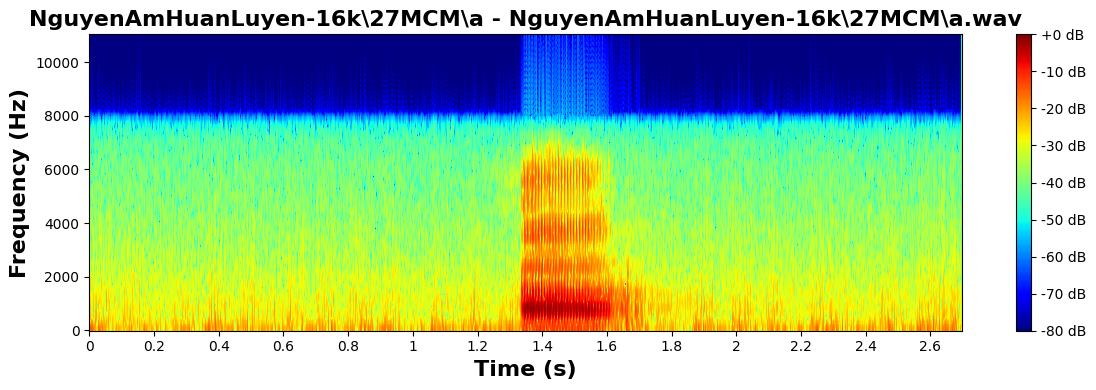

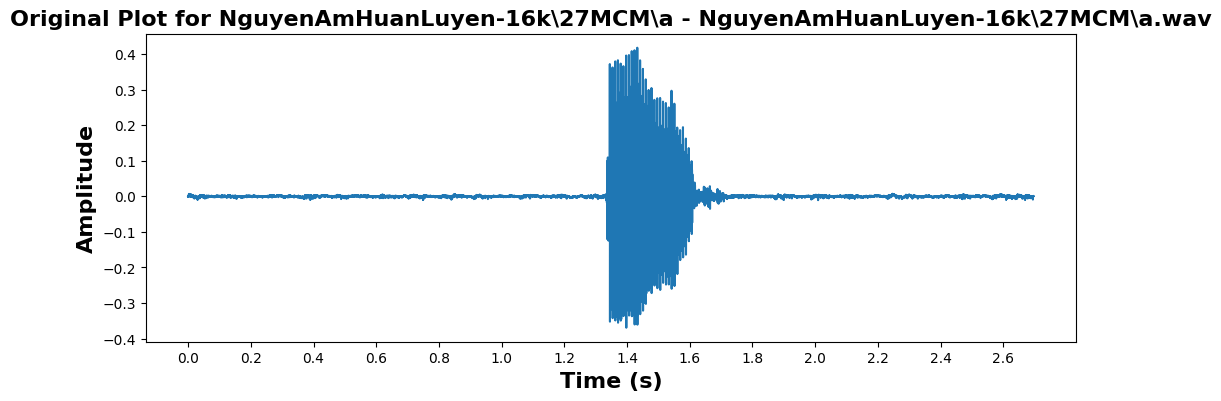

Tần số lấy mẫu của file:  22050


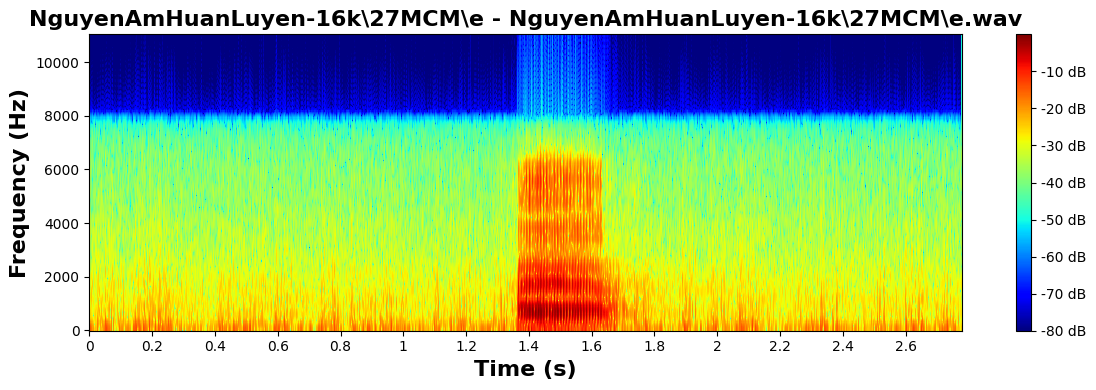

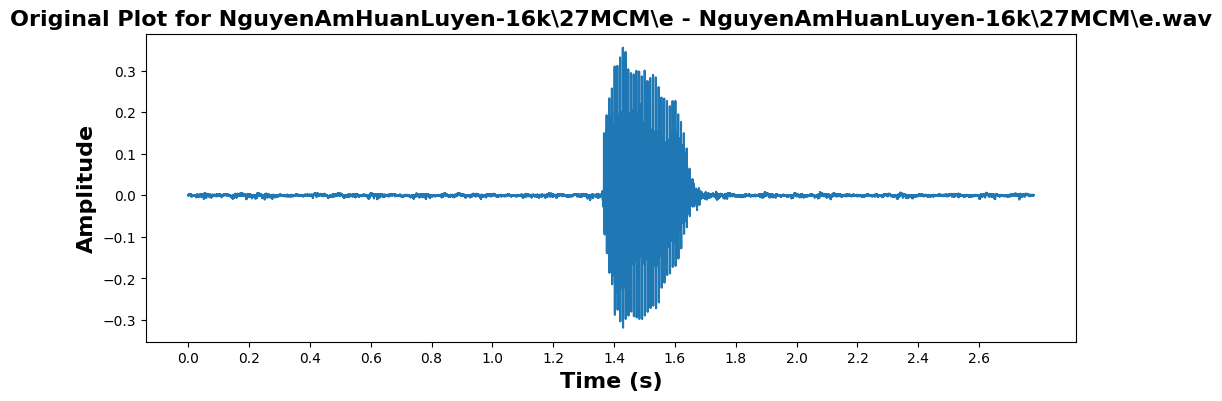

Tần số lấy mẫu của file:  22050


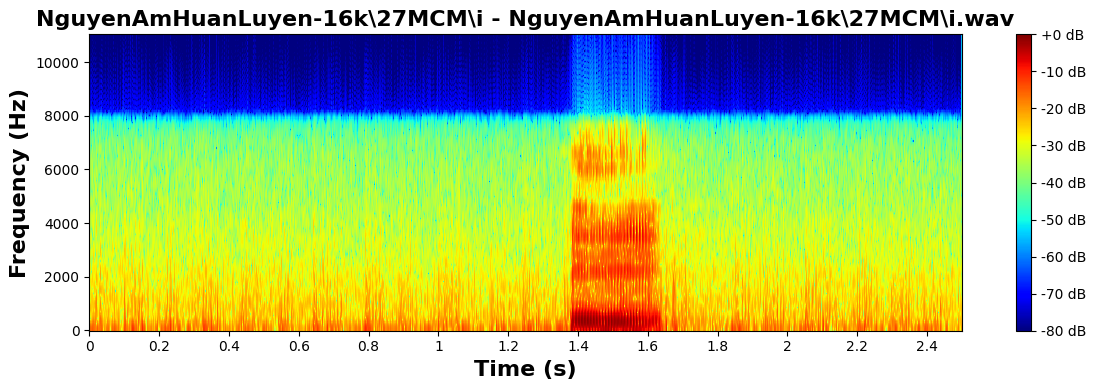

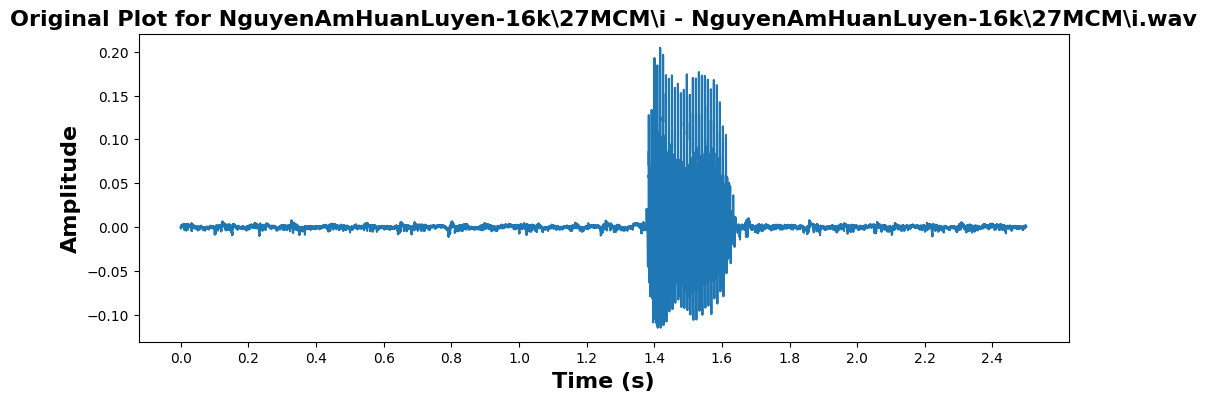

Tần số lấy mẫu của file:  22050


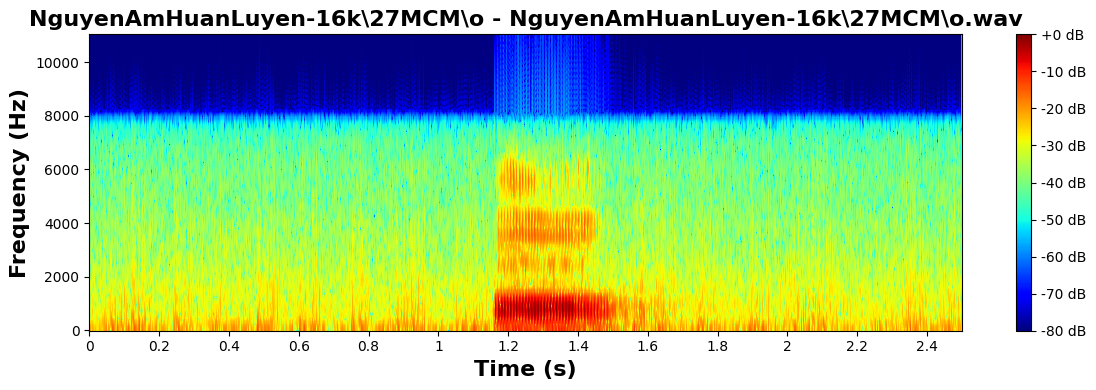

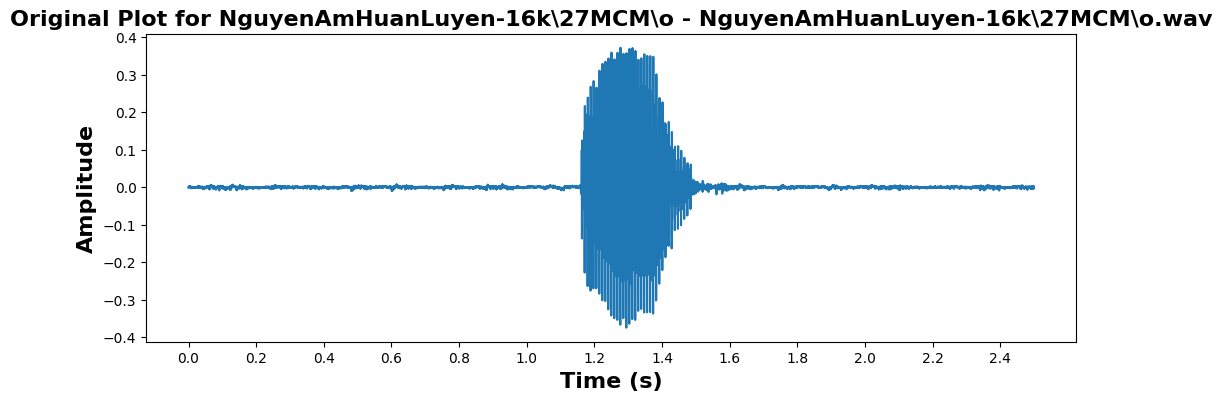

Tần số lấy mẫu của file:  22050


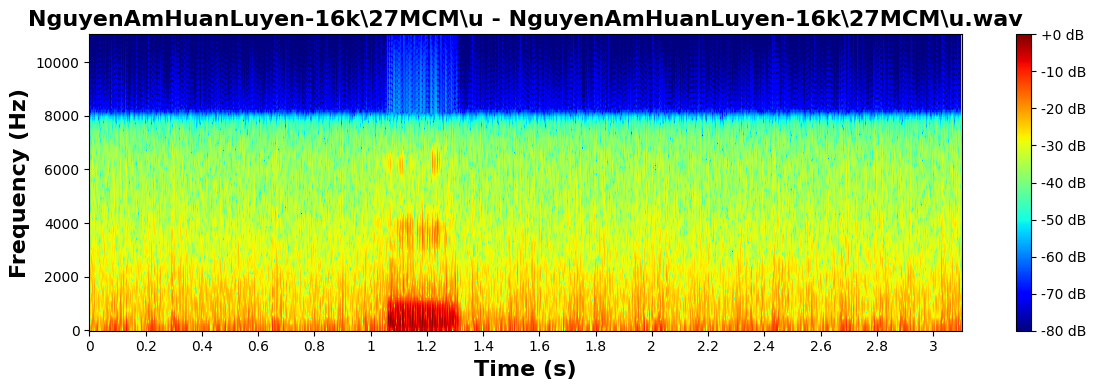

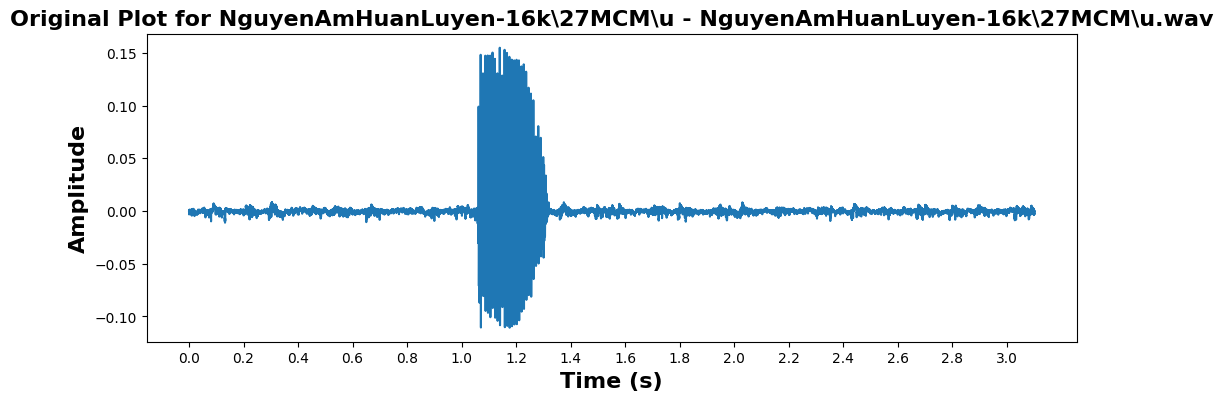

-------------------------------
-----------CHARTS FOR 30FTN-----------
Tần số lấy mẫu của file:  22050


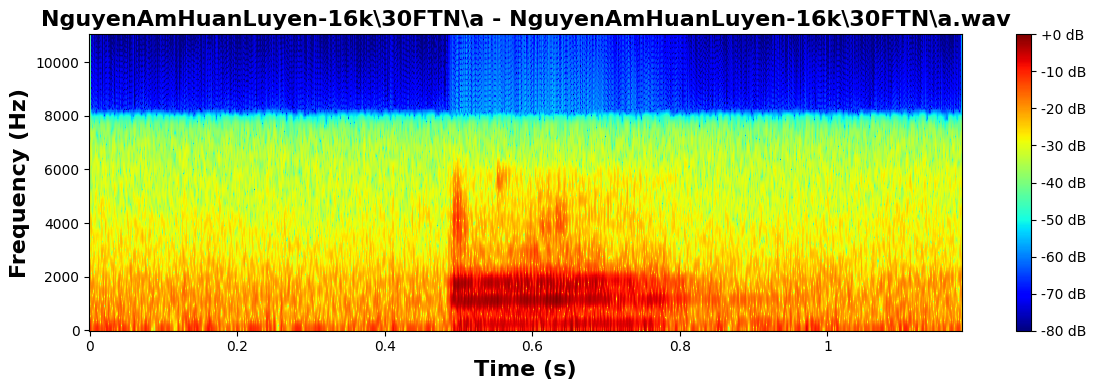

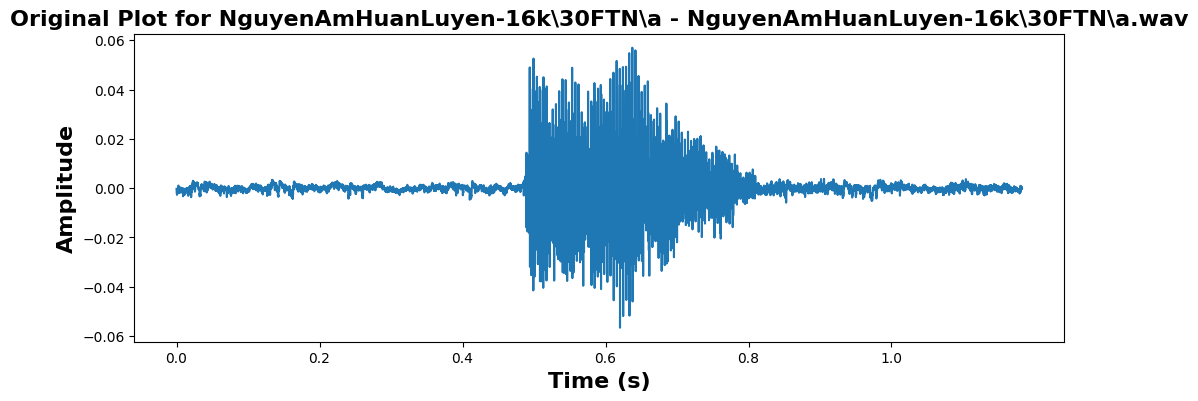

Tần số lấy mẫu của file:  22050


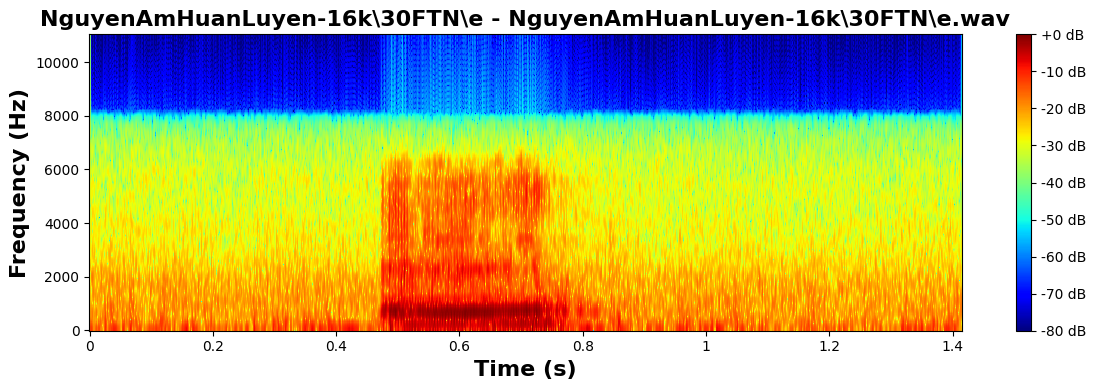

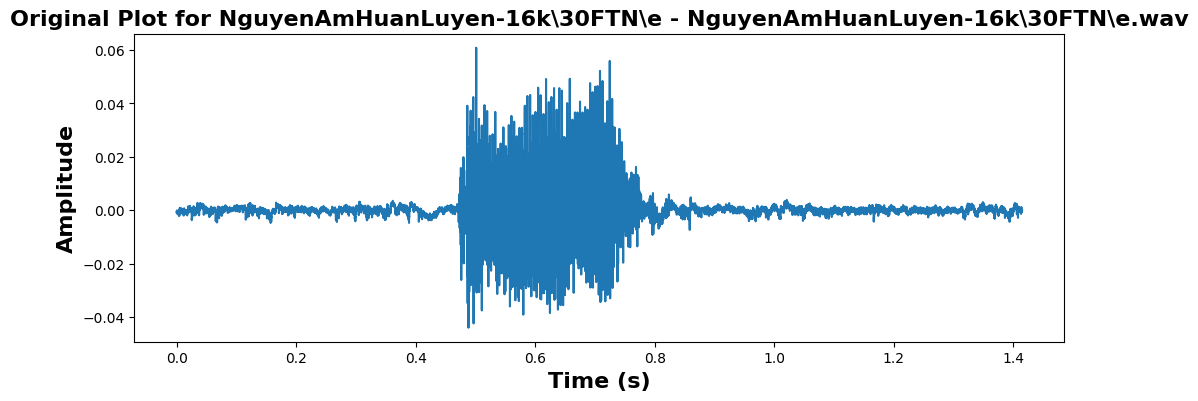

Tần số lấy mẫu của file:  22050


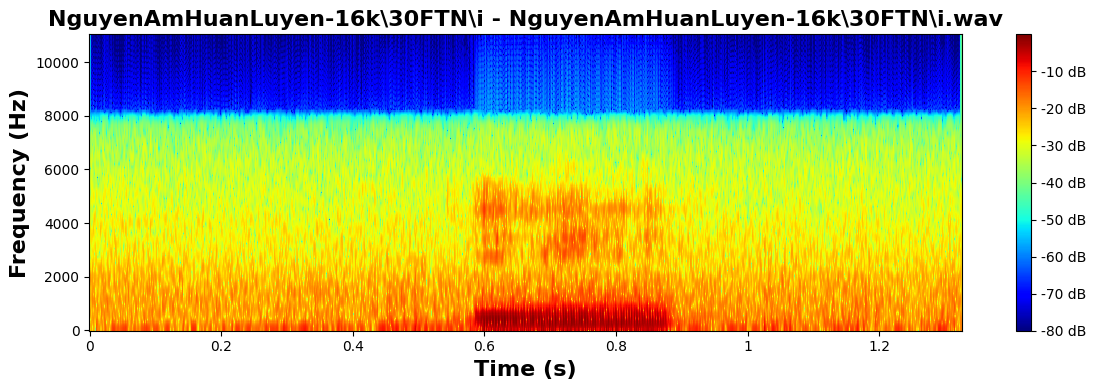

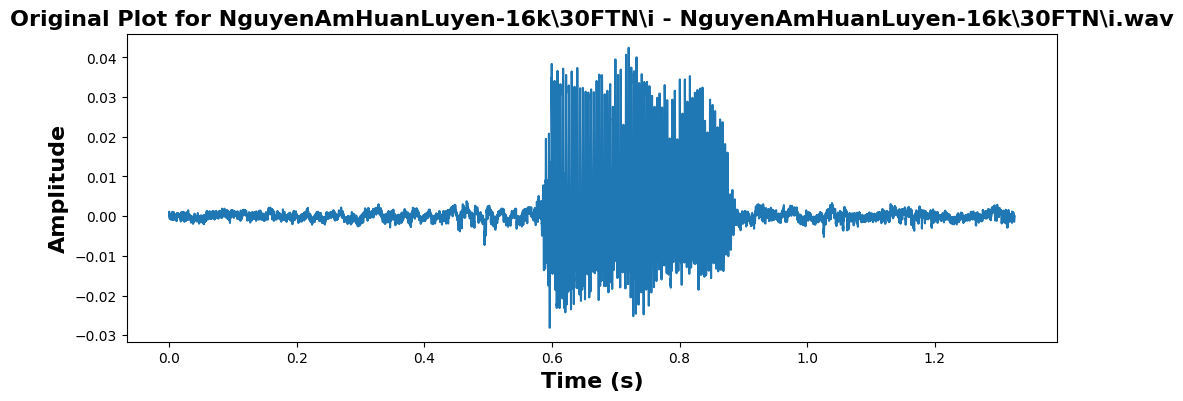

Tần số lấy mẫu của file:  22050


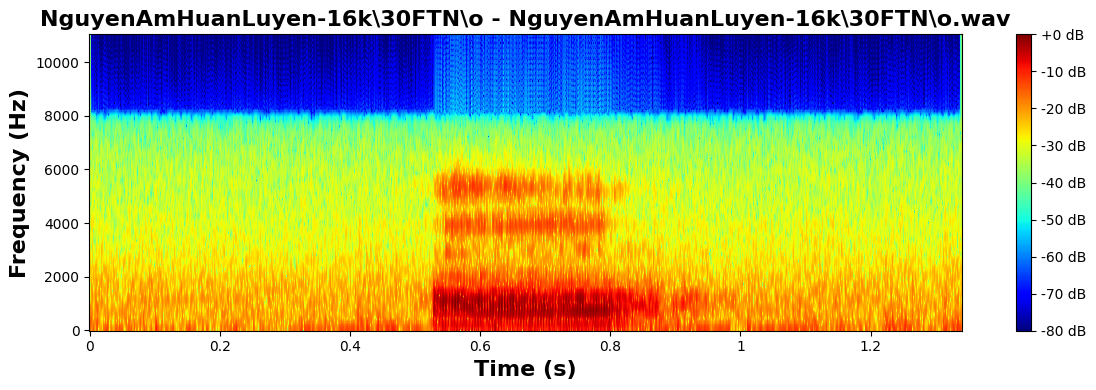

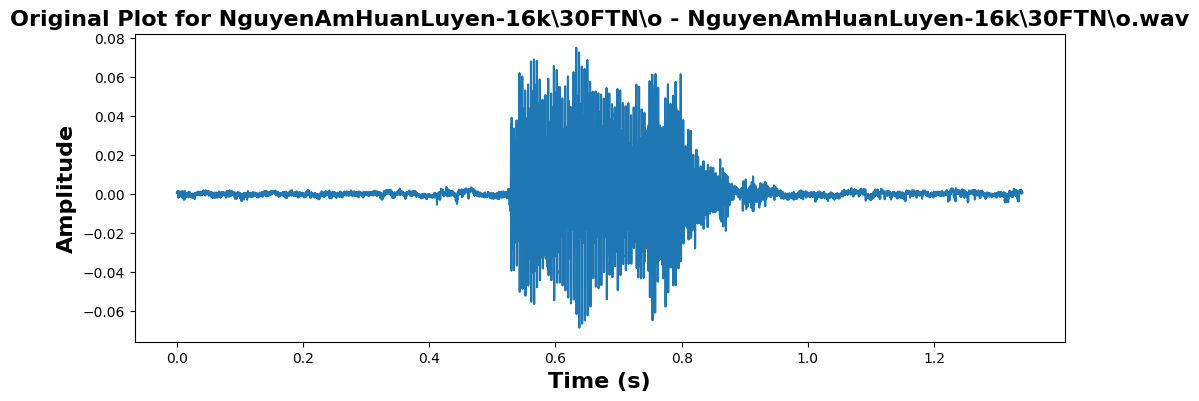

Tần số lấy mẫu của file:  22050


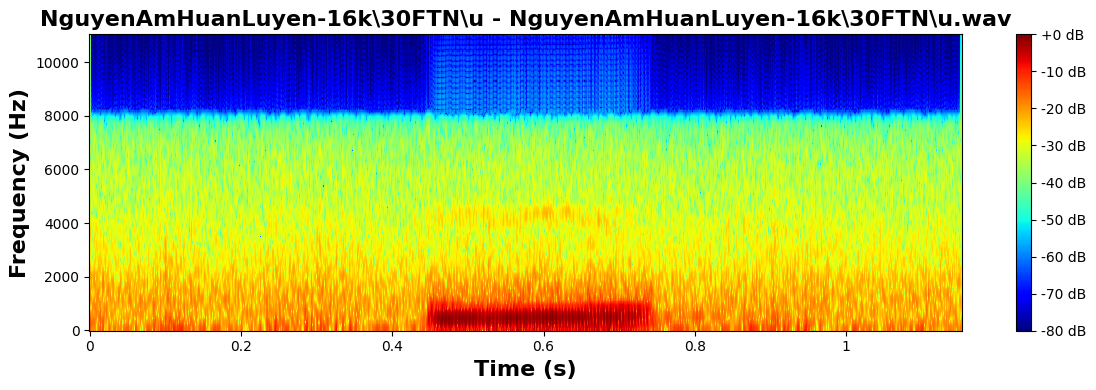

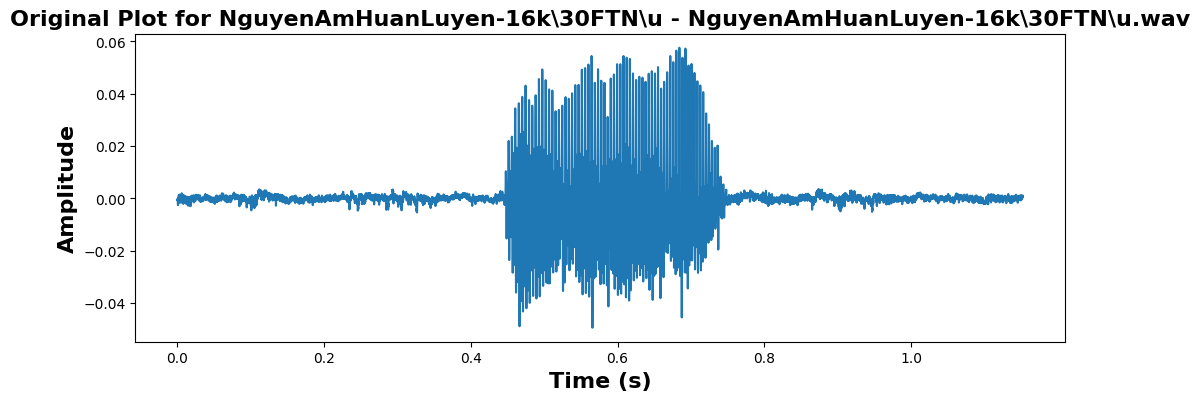

-------------------------------
-----------CHARTS FOR 35MMQ-----------
Tần số lấy mẫu của file:  22050


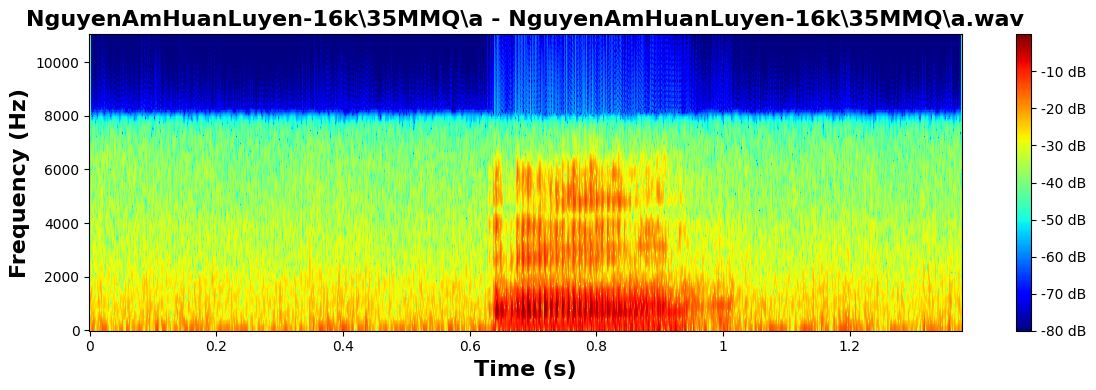

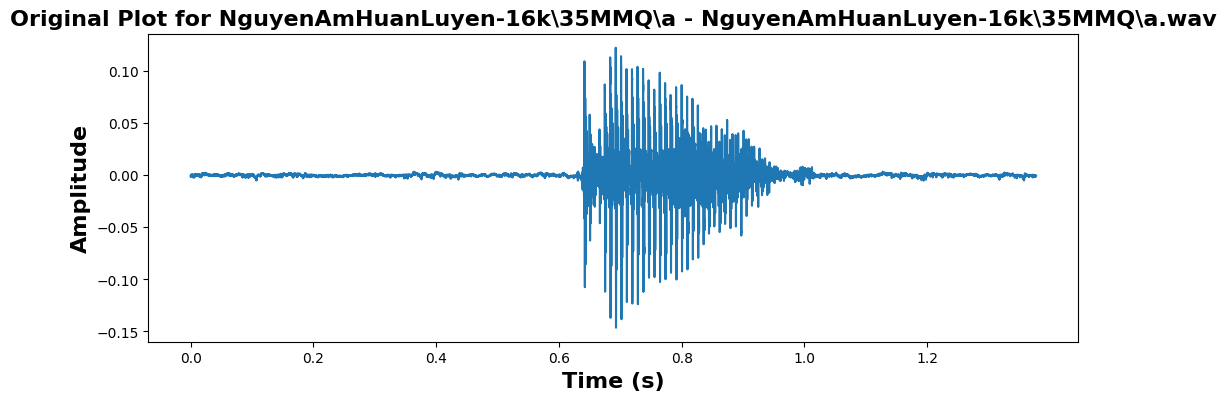

Tần số lấy mẫu của file:  22050


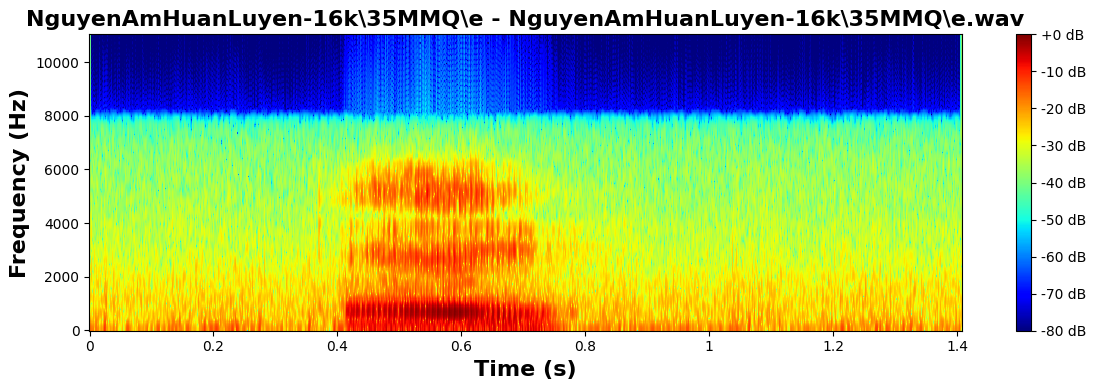

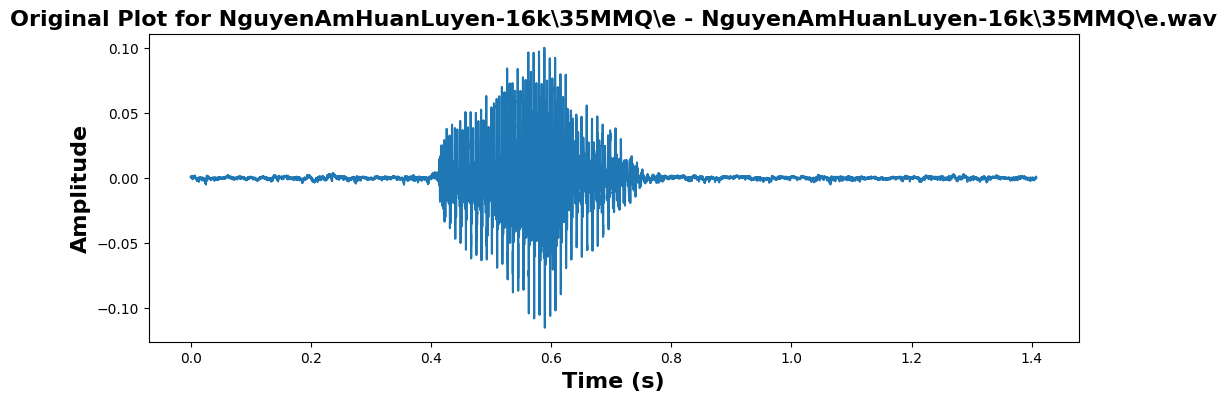

Tần số lấy mẫu của file:  22050


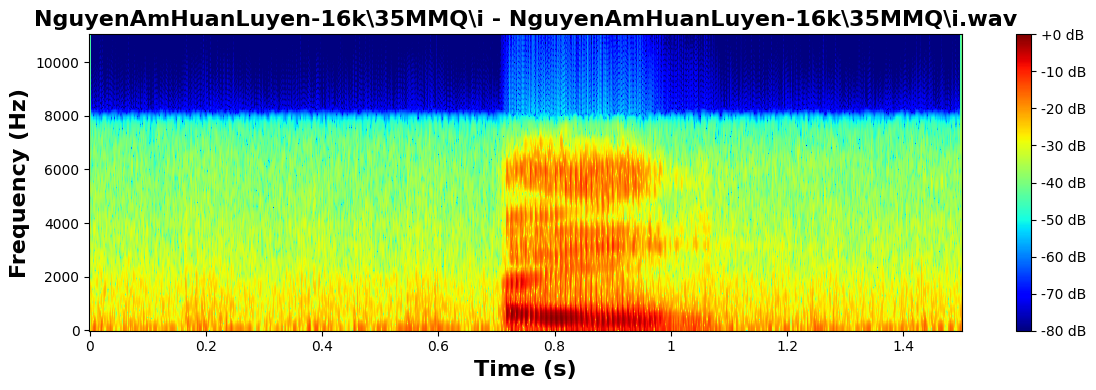

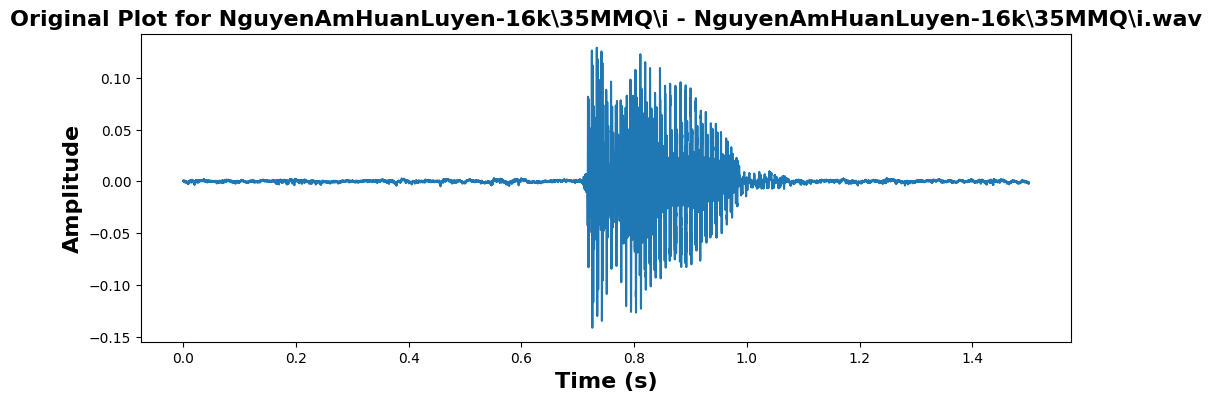

Tần số lấy mẫu của file:  22050


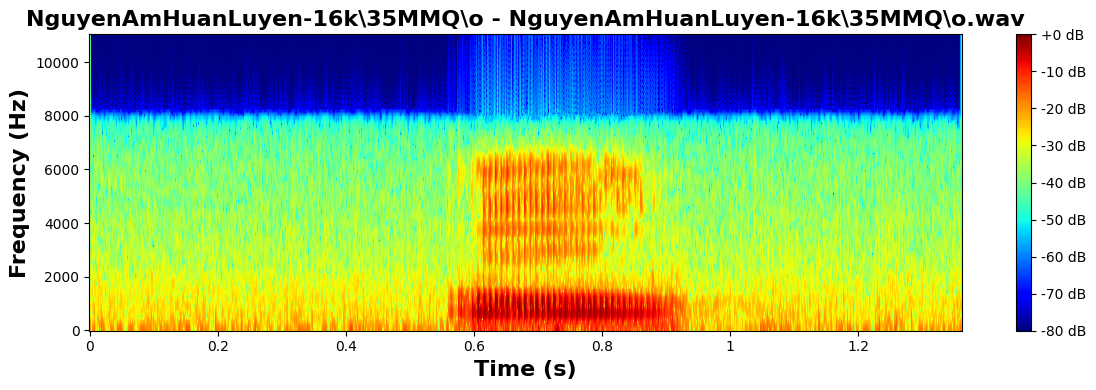

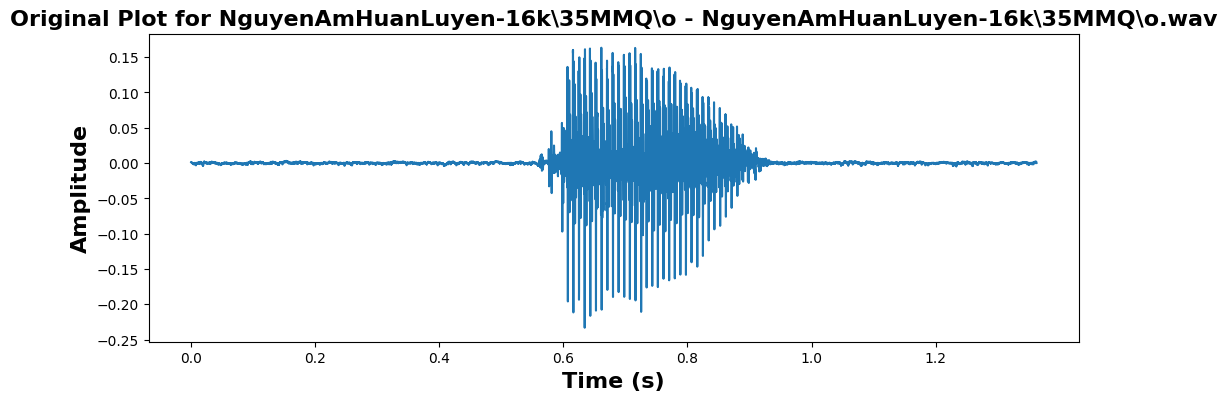

Tần số lấy mẫu của file:  22050


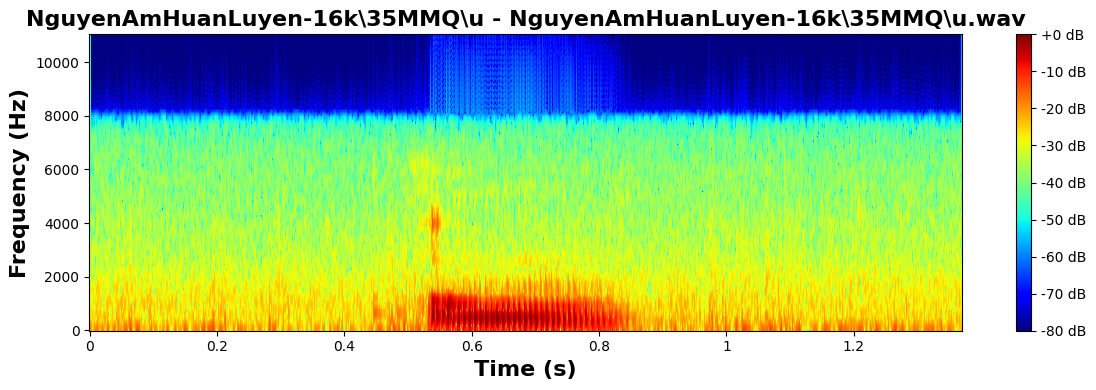

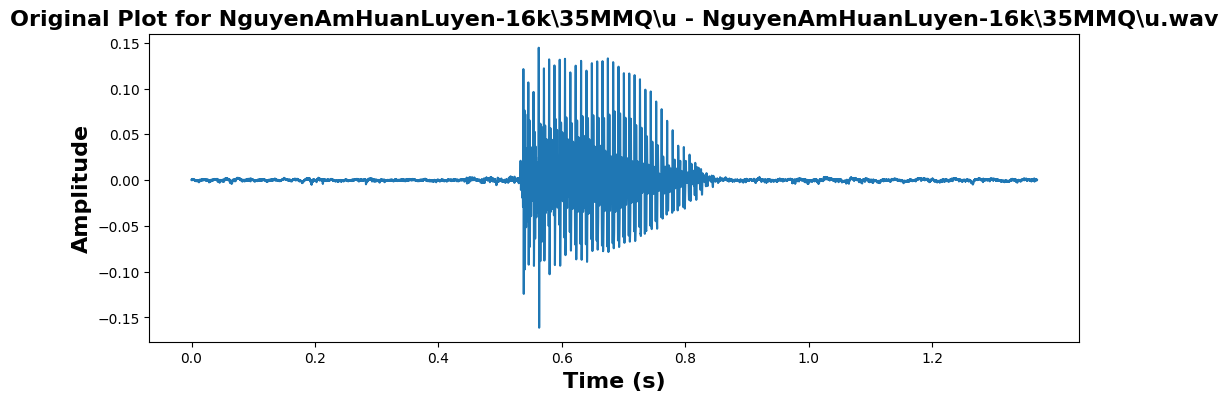

-------------------------------
-----------CHARTS FOR 36MAQ-----------
Tần số lấy mẫu của file:  22050


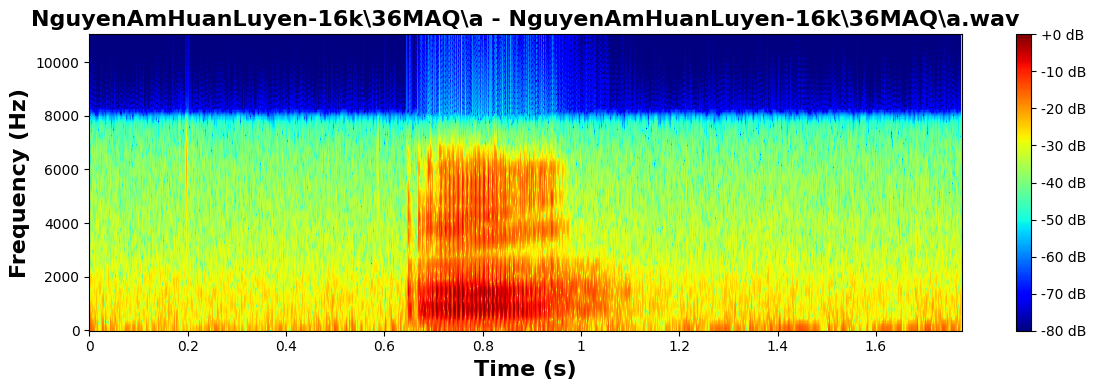

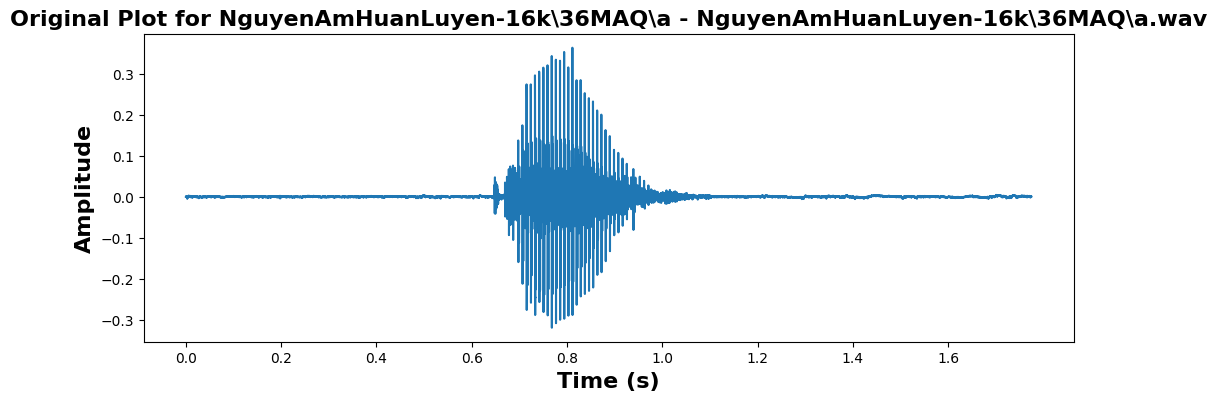

Tần số lấy mẫu của file:  22050


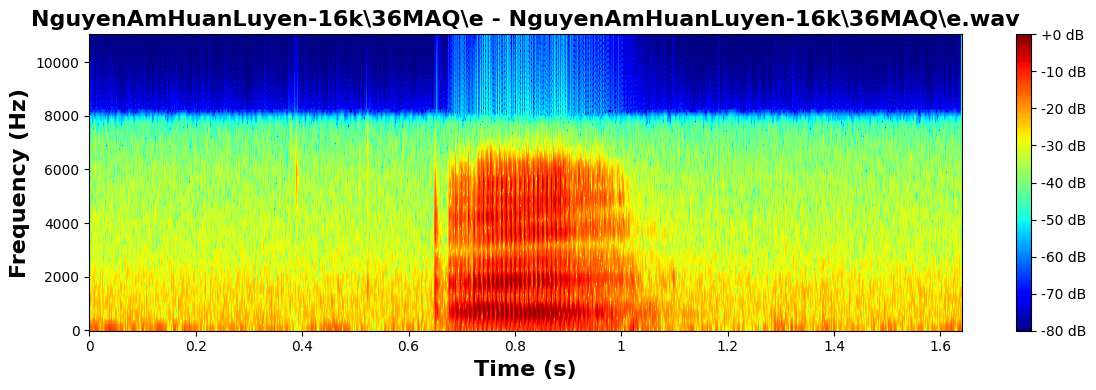

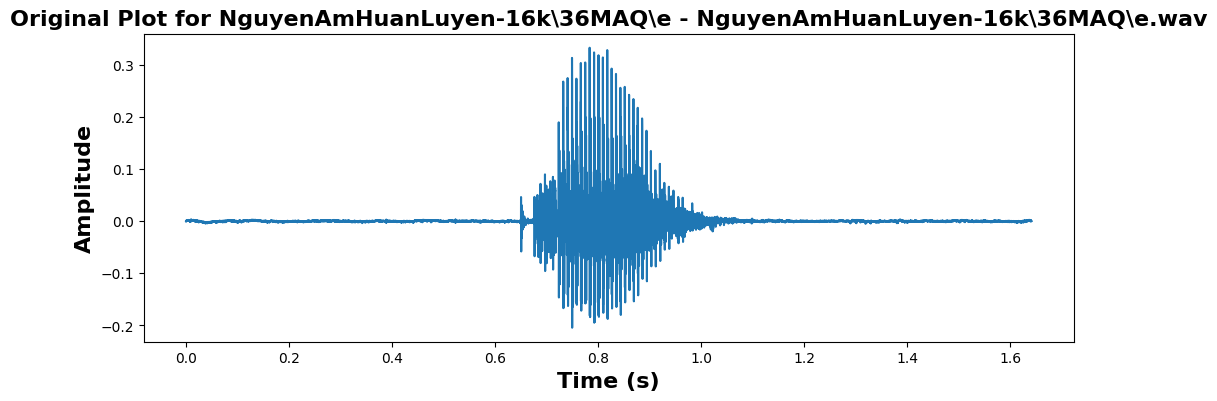

Tần số lấy mẫu của file:  22050


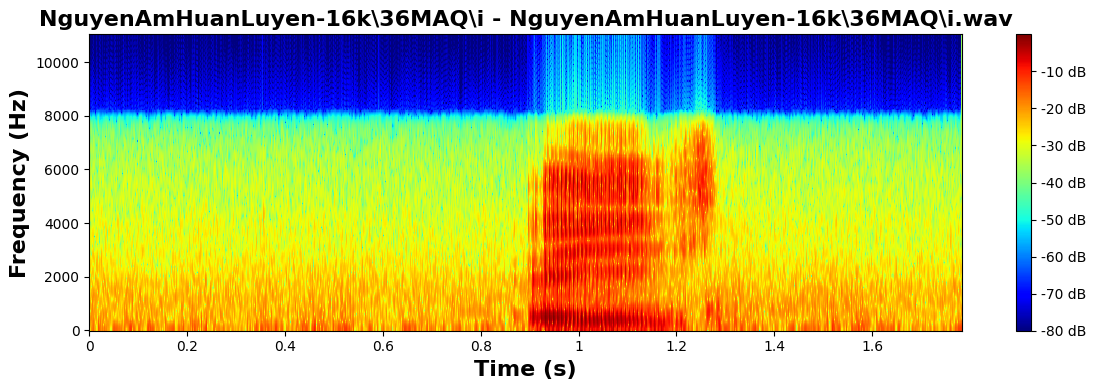

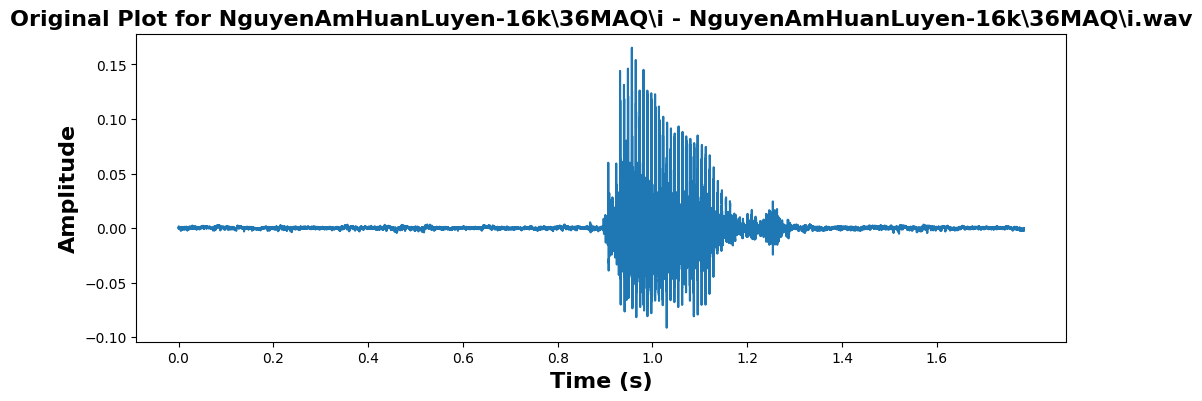

Tần số lấy mẫu của file:  22050


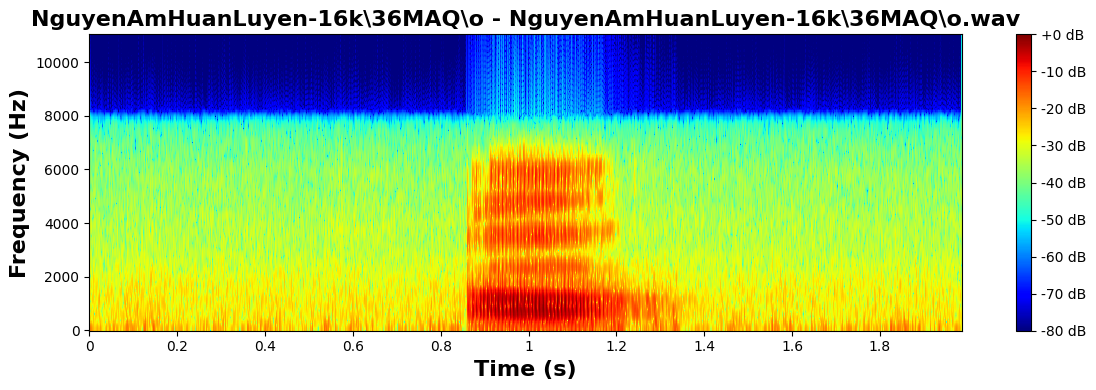

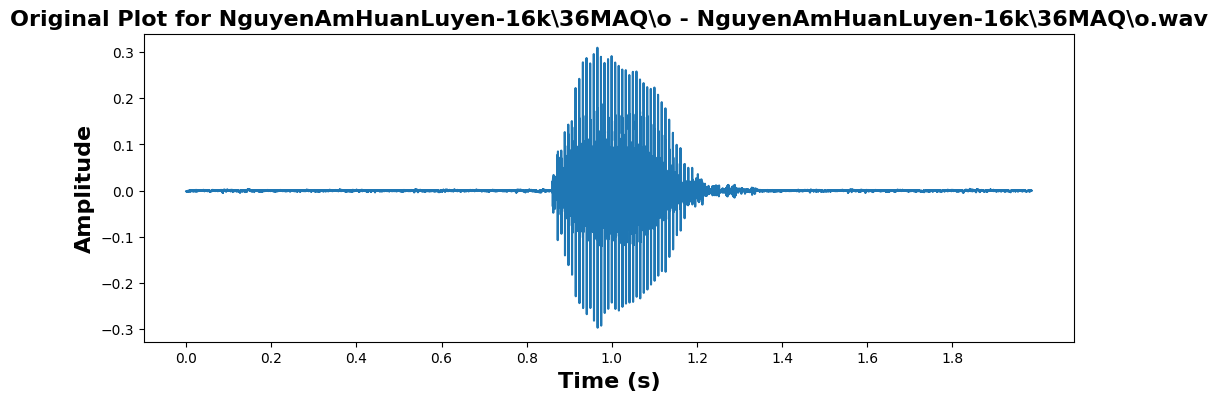

Tần số lấy mẫu của file:  22050


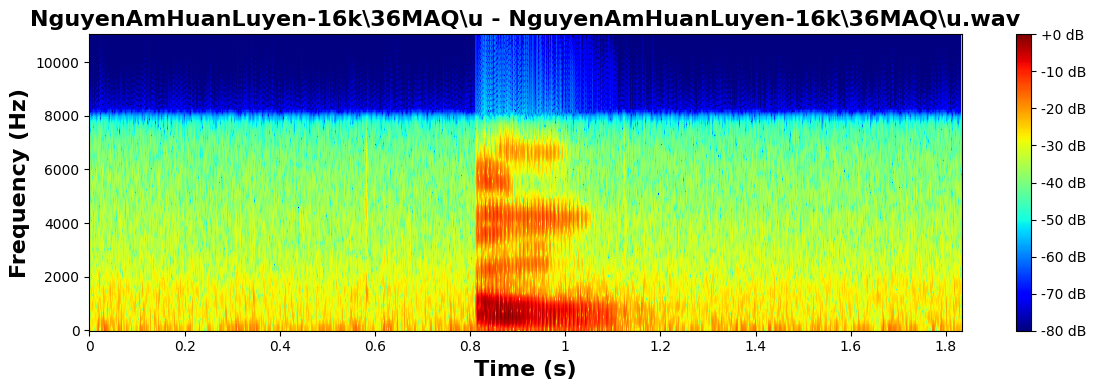

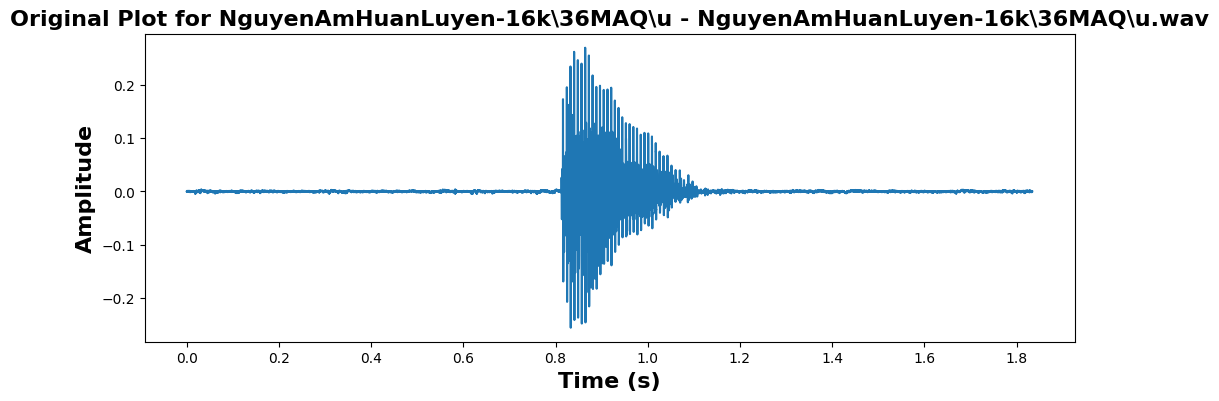

-------------------------------


In [5]:
for item in selected_element_folder_audio:
    print(f"-----------CHARTS FOR {item['folder_name']}-----------")
    for audio_path in item['audio_files']:
        vowel_file = audio_path.split('/')[-1]
        label_vowel = vowel_file.split('.')[0]
        # Load the audio file
        y, sr = librosa.load(audio_path)
        print("Tần số lấy mẫu của file: ", sr)
        # Plot Mel spectrogram
        plot_custom_mel_spectrogram(y=y, sr=sr, wideband_time=5, jump_hop_length= 1/4, window ='blackman', n_fft=512, time_division=0.2, title=f'{label_vowel} - {audio_path}')
        # Plot original audio file
        plot_original_audio(y=y, sr=sr, title=f'Original Plot for {label_vowel} - {audio_path}', time_division=0.2)

    print("-------------------------------")

